- 11주차 한글 텍스트 분석 실습 내용을 참조하여, 관심있는 웹사이트의 텍스트를 크롤링하여 감성 분석을 하시오.  
- 텍스트 셀에"분석 결과에 대한 본인의 해석"도 적어 주세요. 

# [분석 결과]

## 1. 옥션 베스트 상품 크롤링 결과
쇼핑몰 리뷰 분석을 하고 싶어서 옥션의 베스트 상품 목록을 알아보았다. 
하단의 "1 옥션(Auction) 크롤링"의 결과를 출력하면 실시간으로 parsing되어 베스트 상품 목록에 변화가 있었다.(특히 행사 상품에 변동이 많음). 실시간으로 변화되는 결과를 가져오는 것이 흥미로웠지만 실시간으로 베스트 상품이 변화하므로 리뷰 분석을 하여 과제 결과물로 제출하기엔 적절하지 못하다고 판단하였다.

---


## 2. 네이버 영화 리뷰 분석 결과
#### **1) 2005년 2월 7일부터 네이버 영화 데이터가 생성되었다.**

1995년 12월 21일로 date를 설정하였으나 2005년 2월 7일 기준으로 영화가 검색되었고   
2005년 2월 8일로 날짜를 변경한 후로 date가 바뀌었다.

#### **2)** 2005년 2월 7일 기준, 영화 "말아톤"이 1위를 기록했다.

#### **3)** 세 페이지의 리뷰 평점 중 대부분이 10점이고, 최저가 8점인 것으로 보아 인기가 대단했음을 알 수 있었다.

#### **4) 토큰화한 감정분석 결과 중 '부정'부분의 분석결과에 오류가 많다.**
영화 말아톤은 자폐아동에 대해 다룬 영화임에도 불구하고 리뷰에 "장애", "자폐"라는 단어가 언급되면 부정적인 리뷰로 분석해버리는 한계가 있었다.

#### **5) 영화 혹은 조승우의 연기에 감동한 관람객이 많다.**

워드 클라우드를 통해 본 영화 말아톤의 리뷰에서는 주연 배우 '조승우'에 대한 언급과 '연기' 그리고 '영화'에 대한 내용이 많았다. 또한 '감동'이라는 감정단어가 보이는 것으로 보아 영화 혹은 조승우의 연기에 감동한 관람객이 많다고 생각할 수 있었다.

#### **6) 말아톤은 '감동실화' 영화이다.**
토픽 모델링의 결과에서도 공통적으로 '조승우', '영화', '연기'라는 단어가 도출되었고 '자폐', '감동', '눈물', '실제'라는 단어들의 빈도가 높은 것으로 보아 많은 감동실화 영화임을 알 수 있었다.

#### **7) '진짜','너무' 등의 부사어 활용방안을 생각해보아야 한다.**
네이버 영화 리뷰 분석을 하며 "진짜", "너무"와 같은 부사어 등장의 빈도수가 높음을 알 수 있었다. 특정 동사를 강조하는 단어임에도 불구하고 무의미하게 버려지는 것이 안타까웠고, 추후 이런 부사어에 가중치를 두어 리뷰 분석을 한다면 지금보다 정확도가 높은 리뷰 분석을 할 수 있을 것이라고 생각한다.



---



# 한글 텍스트 분석

## 0 한글폰트 준비


In [1]:
# 한글 폰트(나눔고딕) 설치 및 적용
!apt-get update -qq
!apt-get install fonts-nanum* -qq              # 나눔 폰트 설치

In [2]:
# 폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 실행
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 
# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)
fm._rebuild()  # 폰트 적용

NanumGothic


## 1 옥션(Auction) 크롤링

수집하고자 하는 문서 
- 옥션(Auction) 베스트: http://corners.auction.co.kr/corner/categorybest.aspx

BeautifulSoup 
- HTML 또는 XML 문서로부터 데이터를 뽑아내기 위한 파이썬 라이브러리
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/ 

In [3]:
!pip install requests beautifulsoup4 lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# 웹크롤링에 필요한 패키지 설치 
import requests  # 서버와의 통신을 위한 패키지
from bs4 import BeautifulSoup  # 서버에서 받아온 정보를 파싱하는데 사용하는 패키지
import pandas as pd    # 데이터 프레임을 다루기 위한 패키지
import numpy as np
import random, csv, time

In [5]:
url = 'http://corners.auction.co.kr/corner/categorybest.aspx'
response= requests.get(url)
source = response.text

soup = BeautifulSoup(source, 'html.parser')  #문서 해석하는 프로그램(parser)로서 주로 이용되는 패키지:lxml

## 상품명
item = soup.find_all("em")

item_name = [i.a.text for i in item][:200]
item_name

['비버리힐즈 폴로 카라티 베어반팔PK 해외매장판70%+20%',
 '[진라면]진라면 매운맛 40봉',
 '[GUESS]27% 게스 여름 신상 반팔/데님/캐주얼가방 할인전',
 '[해듬뿍]완도 전복 16-18미 1KG 쿠폰가 23920 횟감용 크기 전복',
 '(이마트USA) 고당도 제스프리 썬골드키위 점보사이즈 2.4kg(16-18과)',
 '[CGV]22년5월_CGV옥션예매권(2D)',
 '농협 청원생명쌀 10kg 추청쌀 특등급 완전미 추가쿠폰',
 '[브라운]브라운 정품 적외선 귀체온계 IRT6030 /필터21개포함',
 '[달바]워터풀 톤업 선크림 50ml 1+1 이선빈pick 핑크빛 물광',
 '[피죤]피죤 섬유유연제 2800ML 4개 핑크로즈',
 '성주참외 11kg랜덤(실중량10kg내외)3시간 타임세일특가',
 '[동원에프앤비]동원 자연산골뱅이 300g x 5개',
 '서천 노지 햇 완두콩 2kg/2개주문시5kg발송',
 '[제로]1+1 2개세트)위닉스 공기청정기 제로3.0 AZGE500-JWK',
 '[락토핏]최종46840원) 락토핏 5X 생유산균 골드 5통 +증정',
 '[시크릿데이](6팩 11820원) SAP FREE 코튼 생리대/복수구매 사은품',
 '[아디다스]아디다스 남성 드로즈 득템 선물박스 특가5종',
 '점보 버팔로윙 1kg+봉1kg(쿠폰21350원)/에어프라이어',
 '[포스트]포스트 단백질바 500g x 4개/간식/프로틴바/에너지바',
 '[피스넷]끊김없는 완전무선 블루투스이어폰 피스넷 프리고',
 '[터치미]대용량 데일리 썬크림 기능성 선크림 3개 SPF50+ PA+++',
 '[갤럭시]갤럭시 S22 자급제 256GB SM-S901N +삼성정품필름 특가',
 '감자 2022 국내산 햇 감자 5kg(특)',
 '[CJ고메]바삭쫄깃한 탕수육 450g 3봉',
 '농협 세종대왕쌀 20kg 상등급 쿠폰가 42890원/당일도정',
 '[에드워드권]방송최저가  에드워드권 뼈없는 갈비탕 10팩',
 '불고빨고 365 강력 무선 에어건 무선

In [6]:
## 판매가격
sale = soup.find_all('span', class_="sale")

sale = [i.text for i in sale][:200]
sale

['29,900원',
 '20,900원',
 '17,000원',
 '29,900원',
 '21,850원',
 '9,300원',
 '29,900원',
 '63,900원',
 '32,000원',
 '12,900원',
 '16,900원',
 '26,900원',
 '11,900원',
 '289,000원',
 '66,900원',
 '18,900원',
 '30,000원',
 '21,900원',
 '31,150원',
 '48,890원',
 '9,900원',
 '909,900원',
 '15,900원',
 '22,320원',
 '49,900원',
 '56,910원',
 '99,000원',
 '42,900원',
 '15,900원',
 '8,900원',
 '22,500원',
 '10,900원',
 '20,980원',
 '35,610원',
 '10,900원',
 '17,570원',
 '9,900원',
 '24,900원',
 '649,000원',
 '10,900원',
 '15,900원',
 '838,800원',
 '22,400원',
 '64,350원',
 '52,630원',
 '10,900원',
 '5,990원',
 '10,000원',
 '24,210원',
 '39,920원',
 '7,900원',
 '10,000원',
 '16,900원',
 '20,900원',
 '35,900원',
 '18,900원',
 '31,900원',
 '23,900원',
 '9,100원',
 '22,900원',
 '8,900원',
 '32,400원',
 '49,000원',
 '69,900원',
 '13,900원',
 '44,900원',
 '28,900원',
 '35,900원',
 '9,900원',
 '18,900원',
 '16,200원',
 '9,290원',
 '14,900원',
 '28,900원',
 '13,900원',
 '23,500원',
 '25,900원',
 '15,900원',
 '33,900원',
 '20,720원',
 '16,900원',
 '19,900원',
 '26,260원',
 '16,900원'

In [7]:
## 인기 순위
rank = soup.find_all('div', class_='rank')

rank = [i.string for i in rank]
rank

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '13

In [8]:
# 아이템 코드
item_code = [i.a['href'].split('?')[1].split('&')[0].replace('ItemNo=','') for i in item][:200] #코드만 추출
print(item_code)

['B490749767', 'C589477643', 'B867260737', 'C561547302', 'C604289763', 'C587328500', 'C498591697', 'C585265411', 'C394597810', 'C224990414', 'B635008994', 'A112880769', 'B689021262', 'C283684167', 'B651829783', 'C472870507', 'C590944302', 'C404239525', 'C592727099', 'B471025330', 'B856761839', 'C534237361', 'C324090495', 'C315112292', 'C507390688', 'C558392433', 'C558340838', 'C376279140', 'B585686161', 'B694816931', 'C349439228', 'C470114305', 'C535438704', 'B718685009', 'C470197247', 'C509183653', 'C363970231', 'B740817301', 'C281487373', 'C470195526', 'B558819771', 'C220993693', 'B805955265', 'C609547008', 'C211272426', 'B400169709', 'C494542728', 'B799277457', 'C589481334', 'C603484081', 'C604374922', 'B862594540', 'C404142088', 'B800223991', 'C406451554', 'C608341848', 'C596265668', 'C483066409', 'C588453744', 'B477757763', 'B790297590', 'C458834890', 'C477753522', 'B805847094', 'B866355839', 'C376254813', 'B858024324', 'B859278576', 'C224420922', 'B676537696', 'C602080934', 'C609

In [9]:
market = pd.DataFrame({'순위' : rank, '코드':item_code, '상품명' : item_name,'판매가격':sale})
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      200 non-null    object
 1   코드      200 non-null    object
 2   상품명     200 non-null    object
 3   판매가격    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [10]:
market.head()

,순위,코드,상품명,판매가격
0,1,B490749767,비버리힐즈 폴로 카라티 베어반팔PK 해외매장판70%+20%,"29,900원"
1,2,C589477643,[진라면]진라면 매운맛 40봉,"20,900원"
2,3,B867260737,[GUESS]27% 게스 여름 신상 반팔/데님/캐주얼가방 할인전,"17,000원"
3,4,C561547302,[해듬뿍]완도 전복 16-18미 1KG 쿠폰가 23920 횟감용 크기 전복,"29,900원"
4,5,C604289763,(이마트USA) 고당도 제스프리 썬골드키위 점보사이즈 2.4kg(16-18과),"21,850원"


In [11]:
market.tail()

,순위,코드,상품명,판매가격
195,196,B511728921,[FILA]20%쿠폰 성인/아동 로고 반팔티/여름의류/슬리퍼 외,"19,000원"
196,197,C568309358,[OLZEN](올젠)스판 프리즘 여름 팬츠 4종ZPC2PP1502,"28,080원"
197,198,C224437130,1+1+1 대용량 아이몽땅버블 폼폼휘핑클렌저250ml 7종,"17,000원"
198,199,C358256514,[필립스](44만원대)PHILIPS 3200 에스프레소 머신 EP3221/43,"590,000원"
199,200,C390359297,[BURBERRY](스클가 551200)버버리 80278751 햄프셔 체인숄더 4색,"689,000원"




---

## 2 영화 "말아톤" 리뷰 감성 분석 

영화 리뷰 텍스트를 토큰화 하고 긍정/부정 여부를 판정함 

- KoNLPy 형태소 분석기 이용 
  - Okt(Open Korea Text, 트위터에서 만든 오픈소스 한국어 처리기로 이전에는 Twitter라는 이름으로 사용됨), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)
  - 성능비교:  https://konlpy-ko.readthedocs.io/ko/v0.4.3/morph/#pos-tagging-with-konlpy

- 불용어 리스트는 직접 만들어서 사용 
  - https://www.ranks.nl/stopwords/korean

- 감성 사전 (스노우보드에서 polarity.csv 화일을 다운로드 받아 BigMining 폴더에 업로드하기)
  - KOSAC (한국어감성분석코퍼스)의 lexicon 데이터 중 일부 한국어 감정 어휘 목록 
  - http://word.snu.ac.kr/kosac/lexicon.php 


vs. 영문 텍스트의 감성 분석
  - Bing Liu’s lexicon, MPQA subjectivity lexicon, Pattern lexicon, TextBlob lexicon, AFINN lexicon,SentiWordNet lexicon, VADER lexicon

In [12]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=19951221'
response= requests.get(url)
source = response.text

soup = BeautifulSoup(source, 'html.parser')

top_list = soup.find_all("div", "tit5")
movie_name = [i.a.text for i in top_list]

movie_code = [i.a['href'].split('?')[1].replace('code=','') for i in top_list] #코드만 추출

score_list= soup.find_all('td', 'point')
movie_score = [i.string for i in score_list]

movie = pd.DataFrame({'code' : movie_code, 'name': movie_name, 'score' : movie_score})
movie['score'] = movie['score'].astype(float)

movie

,code,name,score
0,39436,말아톤,9.43
1,36798,인크레더블,9.09
2,38464,"조제, 호랑이 그리고 물고기들",9.06
3,39479,뉴 폴리스 스토리,8.70
4,39369,오페라의 유령,8.38
5,39576,쿵푸 허슬,8.10
6,37491,거미숲,8.03
7,39482,공공의 적 2,7.85
8,38883,내셔널 트레져,7.52
9,39134,빈 집,7.34


In [13]:
# 네이버 영화 리뷰 
#base_url = "https://movie.naver.com/movie/bi/mi/review.nhn?code={}&page={}"
#base_url = "https://movie.naver.com/movie/point/af/list.nhn?sword={}&page={}"
base_url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code={}&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}"


mv_score =[]
mv_rev = []
mv_name =[]

#for i in movie_code :
tmp = [movie_code[0]] # 187320	씽2게더, 시간상 가장 상위에 링크된 하나의 영화만 분석 # tmp = [movie_code[i]
for i in tmp : 
 
  for j in range(1, 4) :  # 3 페이지를 분석 
    url = base_url.format(i, j) 
    print(url)

    # html 소스 가져오기
    res = requests.get(url)
    
    # 규칙적인 URL 접속 작업이 반복되면 네이버 접속 거부당하므로 랜덤한 시간차를 두고 URL에 접속
    rand_sec = random.uniform(0.2, 0.4)  #균등분포
    time.sleep(rand_sec) # 잠깐 휴식 

    if res.status_code == 200 :  ##문제가 없다면 

        # html 파싱
        soup = BeautifulSoup(res.text, 'html.parser')
     
        # 리뷰 가져오기
        review_list =[]   
        for k in range(0, 10):
          review = soup.find('span',{'id':f'_filtered_ment_{k}'})
          review = review.text.strip()
          review_list.append(review)

        # 점수 가져오기    
        scores = soup.find_all('div', {'class':'star_score'})
        score_list = [tag.em.text for tag in scores]
           
        # 다양한 방법으로 원하는 데이터를 가져올 수 있음
        #  soup.select('table.list_netizen > tbody > tr > td.title')
        #  soup.find("a")["href"].strip()

        mv_score = mv_score + score_list
        mv_rev = mv_rev + review_list

        print(review_list)
        print(score_list)

        # 영화 이름 가져오기    
        for k in range(0, 10):
            mv_name.append(movie['name'][movie['code']== i].values[0])


https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=39436&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1
['우리 아이에게는 장애가 있어요... 정말 울컥했던 대사.. 너무 잘 만들었고 조승우 또한 연기를 너무 잘했다.. 처음에 조승우라는 배우 몰랐을 때 진짜 자폐증 있는 사람 섭외한 줄 알았음', '"우리아이에게는 장애가 있어요"이말할때 진짜 눈물이 미친듯이남 ㅠㅠㅠ', '말이 필요없는 내안의 명작영화!조승우의 명연기에 할말을 잃었슴.', '식상하게 억지감동 코드 밀어넣는 영화들관 다른 깊은 맛이 있다. 하나같이 연기를 정말 잘한다..', '이영화는 우리가 장애인에 대한 생각을 다시 하게 만들어가는 것 같아요', '초원이가 웃을때 나도 웃었다.', '조승우연기잘함', '조승우 최고다 연기장난없네', '마지막에 춘천 마라톤에서 엄마가 그냥 돌아가자고 하니까, 초원이가 "초원이 다리는" 이라고 말할 때 나도 모르게 눈물이...', '어렸을때 울면서 본 영화']
['10', '10', '10', '10', '10', '10', '10', '10', '10', '10']
https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=39436&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=2
['조승우의 소름끼칠정도로 흡사한 자폐아 연기가 돋보였던 영화. 스토리또한 수작', '여전히 촌스럽지 않고 볼 때마다 감탄하게 만드는 영화. 조승우씨 연기는 가히 충격적이다. 그를 실제 자폐아로 오인한 이들이 있었을 정도니 감히 천재라 할

In [14]:
# 용이한 데이터 관리를 위해 각 리뷰별 아이디를 생성하여 부여
id = []
for k in range(1, len(mv_rev)+1):
    n = "M" + '{0:04d}'.format(k)
    id.append(n)

result = pd.DataFrame({'rev_id' : id, 'movie_name': mv_name, 'score' : mv_score, 'review': mv_rev})
result.info()
display(result.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rev_id      30 non-null     object
 1   movie_name  30 non-null     object
 2   score       30 non-null     object
 3   review      30 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


,rev_id,movie_name,score,review
25,M0026,말아톤,10,개봉 당시 영화관에서 2번을 관람하였고 당시 고등학교 2학년이었던 나를 특수교사의 ...
26,M0027,말아톤,10,영화관에서 처음 운 영화
27,M0028,말아톤,10,조승우 대박연기 어쩜 이렇게 잘하죠
28,M0029,말아톤,10,다른말은 필요없지..8년전엔 어려서 지루하고 따분하게만 느껴졌지만 지금에서야 가슴 ...
29,M0030,말아톤,10,다시 봤는데.. 전에 봤었을 때랑 또 다른 느낌..


In [15]:
# 설치 시 [bs4] 에러가 떠도 무시하시고 진행해주세요. -> !중요 Restart Runtime을 누르지 말아주세요
!pip install konlpy #Konlpy 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
# 한글 분석을 위한 패키지
from konlpy.tag import Okt #twitter 형태소 분석기

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# 부정점수: 중립점수: 긍정점수' 형식의 감정 사전 (lexicon) 만들기
lexicon = dict()

with open('/content/drive/MyDrive/2022-01/빅데이터마이닝/실습/polarity.csv', 'r', encoding='utf-8-sig') as polarity:
    next(polarity) # csv 파일에서 첫 행(컬럼 이름) 건너뛰기
    for line in csv.reader(polarity):
        key = str()
        for word in line[0].split(';'):
            key += word.split('/')[0]

        lexicon[key] = {'Neg': line[3], 'Neut': line[4], 'Pos': line[6]}

print(lexicon)       

{'가*': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가*있': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가*있었': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가*ㄴ다*': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가': {'Neg': '0.333333333', 'Neut': '0', 'Pos': '0.555555556'}, '가되': {'Neg': '0.363636364', 'Neut': '0.272727273', 'Pos': '0.363636364'}, '가되ㄴ': {'Neg': '0', 'Neut': '1', 'Pos': '0'}, '가되ㄹ': {'Neg': '0', 'Neut': '1', 'Pos': '0'}, '가되어': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가되어야지요': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가아니': {'Neg': '0.666666667', 'Neut': '0.166666667', 'Pos': '0.166666667'}, '가아니ㄴ가': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가아니면': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가아니ㅂ니다': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가가능': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가가능하': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가가장': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가가장많이': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가가장어렵': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가굵': {'Neg': '0', 'Neut': '0', 

In [19]:
# 텍스트 토큰화 작업 함수 
def get_token(text):
    pos = []
    tokenizer = Okt() #twitter 형태소 분석기를 불러옵니다.
    if isinstance(text, float) == True: # 주어진 텍스트가 공백일 시 건너뜁니다.
        tokens = "Nothing"
    else:
        tokens = tokenizer.pos(text) 

        # pos : 품사 태깅(Part-of-speech tagging) (예) ('고질라', 'Noun'), ('VS', 'Alpha'), ('.', 'Punctuation')
        # morphs : 형태소 추출 (예) '마지막', '남은', '타이탄', '급', '괴수', '들'
        # nouns : 명사 추출 (예) '마지막', '타이탄', '괴수', '대결', '지구', '하나'

        
    tags = ['Noun', 'Adjective', 'Verb', 'Adverb'] #형태소 중 명사, 형용사, 동사, 부사만 수집
    
    #불용어 정의: 문장에서 내용을 나타내는데 큰 역할을 하지 않은 기능어. 
    stop_words = ["등", "이", "하", "않", "있", "대하", "하지만", "지", "일", "속", "하", "되", "정책", "및", "한국판", "한국", "오",
                 "서", "있다", "것", "되었습니다", "하는", "한다", "했다", "주", "하였습니다", "대", "했습니다", "하여", "해보세요",
                  "있는", "입니다", "있음", "되거나", "할", "있는", "관련", "뉴딜", "해", "패","시브",
                  "월", "화", "수","목", "금", "토", "일", "를", "나", "그", "위", "고","와", "하며", "의", "가",
                 "하겠습니다", "린리", "해야", "몇", "는", "전", "이를","하고", '시킵니다', '위별', '된', '있습니다', '제',
                 "있는데요", "있는데", "볼", "로", "은", "총", "우","보였다", "하기", "후", "간", "이번", "이준", "때","원",
                 "합시다", "중", "과", "저","분","방","임", "된다","날","함", "있으며","개", "될","며", "보자","합니다","안녕하세요",
                 "같습니다","확","진자","조","다", "스","가를", "얜","얘", "경우", "무엇","대한","내용", "위해", "이후","현재", "보시","비대",
                 "우리", "없는", "모두","관","내","때문","어떻게","어디", "세", "사","회", "미","에이","데","이콘", "료", "게시","물", "그린",
                 "디지털", "한", "꾸준히", "하겠다", "리","두었다", "또한", "들어","통해", "바란다", "다음"," 이어",
                 "됨", "됨", "됌", "또", "됐다", "촬용", "분야", "발표", "매일", "점","출처", "기반", "예정", 
                  "오전", "계획", "오늘", "정부", "더", "마감", "분야", "상","뜻", "특징", "업계", "크게","하나", 
                 "콤", "재", "해서", "같다", "곳", "역시","라며", "처", "첫", "요", "보면", "창", "출", "번", "각각", "예", "홍","남기","겸",
                 "이어", "정", "보기", "워", "황", "령","넨", '사업', '산업', '기업']
    
    for token in tokens:
        if not tokens == "Nothing":
          if token[1] in tags:
            if not token[0] in stop_words: #불용어 제외 
              pos.append(token[0])  #토큰 수집
        else:
           continue

    return pos

In [20]:
#감성분석 함수 정의
def get_sentiment(token_list):
    cnt = 0 # 평균을 내기 위해 토큰 개수 계산
    pos = 0
    neut = 0
    neg = 0
    sentiment = None
    for token in token_list:
        try:
            #lexicon에 토큰이 없으면 건너뜀
            pos += float(lexicon[token]["Pos"]) # 토큰들의 긍정점수를 구해서 더함 
            neut += float(lexicon[token]["Neut"]) # 토큰들의 중립점수를 구해서 더함
            neg += float(lexicon[token]["Neg"]) # 토큰들의 부정점수를 구해서 더함
            cnt += 1
        except:
            continue
            
    if not cnt == 0:   
        pos = pos/cnt # 게시글의 긍정점수 평균 
        neut = neut/cnt # 게시글의 중립점수 평균 
        neg = neg/cnt # 게시글의 부정점수 평균 

        # 논리구조를 통해 게시글의 최종 감성을 판정 
        # 긍정/중립/부정 점수를 비교해서 가장 높은 점수의 감성을 게시글의 감성으로 판정
        if pos > neg:
            if pos > neut:
                sentiment = "positive"
            else:
                sentiment = "neutral"
        elif pos < neg:
            if neg > neut:
                sentiment = "negative"
            else:
                sentiment = "neutral"
        else:
            if pos > neut:
                sentiment = "positive and negative"
            else:
                sentiment = "neutral"   
                
        return pos, neut, neg, sentiment
    else: 
        return [None, None, None, None]

In [21]:
# 감정 분석 결과: 새로운 열 5개 추가
# tokens: 텍스트 토큰화 결과
# pos/nuet/neg: 긍정, 중립, 부정 점수
# sentiment: 최종 감성 평가 결과

result["tokens"] = None
result["pos"] = None
result["neut"] = None
result["neg"] = None
result["sentiment"] = None 
 
for i in range(0, len(result)):
    token_list = get_token(result["review"][i])
    result["pos"][i], result["neut"][i], result["neg"][i], result["sentiment"][i] = get_sentiment(token_list)
    result["tokens"][i] = token_list

result.info()
display(result.head())

#csv 파일로 저장하기
file_name = "movie_sentiment.csv"
result.to_csv(file_name, index = False, encoding = "utf-8-sig")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rev_id      30 non-null     object
 1   movie_name  30 non-null     object
 2   score       30 non-null     object
 3   review      30 non-null     object
 4   tokens      30 non-null     object
 5   pos         29 non-null     object
 6   neut        29 non-null     object
 7   neg         29 non-null     object
 8   sentiment   29 non-null     object
dtypes: object(9)
memory usage: 2.2+ KB


,rev_id,movie_name,score,review,tokens,pos,neut,neg,sentiment
0,M0001,말아톤,10,우리 아이에게는 장애가 있어요... 정말 울컥했던 대사.. 너무 잘 만들었고 조승우...,"[아이, 장애, 있어요, 정말, 울컥, 했던, 대사, 너무, 잘, 만들었고, 조승우...",0.446429,0.159341,0.32677,positive
1,M0002,말아톤,10,"""우리아이에게는 장애가 있어요""이말할때 진짜 눈물이 미친듯이남 ㅠㅠㅠ","[아이, 장애, 있어요, 말, 진짜, 눈물, 미친듯, 이남]",0.239583,0.25,0.34375,negative
2,M0003,말아톤,10,말이 필요없는 내안의 명작영화!조승우의 명연기에 할말을 잃었슴.,"[말, 필요없는, 안, 명작, 영화, 조승우, 명연기, 할말을, 잃었슴]",0.477778,0.033333,0.233333,positive
3,M0004,말아톤,10,식상하게 억지감동 코드 밀어넣는 영화들관 다른 깊은 맛이 있다. 하나같이 연기를 정...,"[식상하게, 억지, 감동, 코드, 밀어, 넣는, 영화, 다른, 깊은, 맛, 하나같이...",0.627083,0.0125,0.316667,positive
4,M0005,말아톤,10,이영화는 우리가 장애인에 대한 생각을 다시 하게 만들어가는 것 같아요,"[이영화, 장애인, 생각, 다시, 하게, 만들어가는, 같아요]",0.315476,0.083333,0.456349,negative


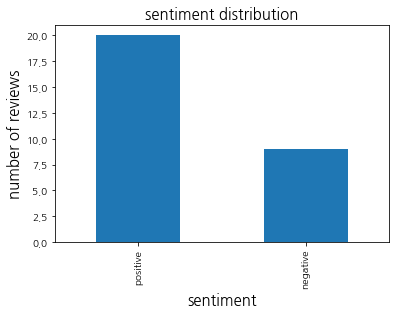

In [22]:
result['sentiment'].value_counts( ).plot(kind='bar') #sentiment별 빈도수로 bar차트 생성

plt.title('sentiment distribution', fontsize=15)
plt.xlabel('sentiment',fontsize=15)
plt.ylabel('number of reviews',fontsize=15 )   
plt.show()


In [23]:
print("긍정판별 리뷰 개수 :", len(result['sentiment'][result['sentiment']=="positive"]))
result['tokens'][result['sentiment']== "positive"][:10]  # 10개 긍정 리뷰 보여주기 

긍정판별 리뷰 개수 : 20


0     [아이, 장애, 있어요, 정말, 울컥, 했던, 대사, 너무, 잘, 만들었고, 조승우...
2              [말, 필요없는, 안, 명작, 영화, 조승우, 명연기, 할말을, 잃었슴]
3     [식상하게, 억지, 감동, 코드, 밀어, 넣는, 영화, 다른, 깊은, 맛, 하나같이...
5                                      [초원, 웃, 나도, 웃었다]
6                                             [조승우, 연기]
7                                  [조승우, 최고다, 연기, 장난없네]
10      [조승우, 소름끼칠, 정도, 흡사한, 자폐, 연기, 돋보였던, 영화, 스토리, 수작]
13                       [조승우, 연기, 개잘, 이런, 영화, 한번, 나오나]
15           [조승우, 연기, 정말, 놀랍습니다, 진짜, 자폐증, 환자, 줄, 알았네요]
18    [청년, 지능, 자폐증, 연기, 자연, 여기, 하신, 조승우, 정말, 당신, 하늘,...
Name: tokens, dtype: object

In [24]:
print("부정판별 리뷰 개수 :", len(result['sentiment'][result['sentiment']=="negative"]))
result['tokens'][result['sentiment']== "negative"][:10] # 10개 부정 리뷰 보여주기 

부정판별 리뷰 개수 : 9


1                     [아이, 장애, 있어요, 말, 진짜, 눈물, 미친듯, 이남]
4                    [이영화, 장애인, 생각, 다시, 하게, 만들어가는, 같아요]
8     [마지막, 춘천, 마라톤, 엄마, 그냥, 돌아가자고, 하니까, 초원, 초원, 다리는...
9                                      [어렸을, 울면, 본, 영화]
11    [여전히, 촌, 않고, 감탄, 하게, 만드는, 영화, 조승우, 연기, 가히, 충격,...
12                           [감독, 말아톤, 한번, 찍고, 내리막, 길이]
14     [특별한, 자폐, 엄마, 로써, 아닌, 모든, 엄마, 가진, 욕심, 사랑, 경계, 선]
17                     [세계, 내놔도, 부끄럽지, 않은, 안되는, 최고, 영화]
20    [살의, 말아톤, 조승우, 살의, 타짜, 조승우, 세월, 흐르지, 않았다, 사이, ...
Name: tokens, dtype: object

## 3 워드 클라우드 만들기

리뷰에 많이 사용된 단어들을 분석하고 워드 클라우드로 시각화 



In [25]:
# Word Cloud를 만들기 위해 필요한 패키지를 설치합니다. 
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
#워드 클라우드 분석에 필요한 패키지를 불러옵니다.
from wordcloud import WordCloud

In [27]:
from collections import Counter 

# 앞서 분석한 토큰들을 words_for_cloud 라는 하나의 리스트로 합침 
words_for_cloud = []
for i in range(0,len(result)):
    token_list = result['tokens'][i]
    words_for_cloud = words_for_cloud + token_list

# 가장 많이 사용된 top 10 단어와 빈도수 출력
frequency = Counter(words_for_cloud).most_common(10)  
print(frequency)

[('조승우', 20), ('영화', 14), ('연기', 13), ('정말', 7), ('배우', 4), ('진짜', 4), ('말', 4), ('감동', 4), ('다시', 4), ('초원', 4)]


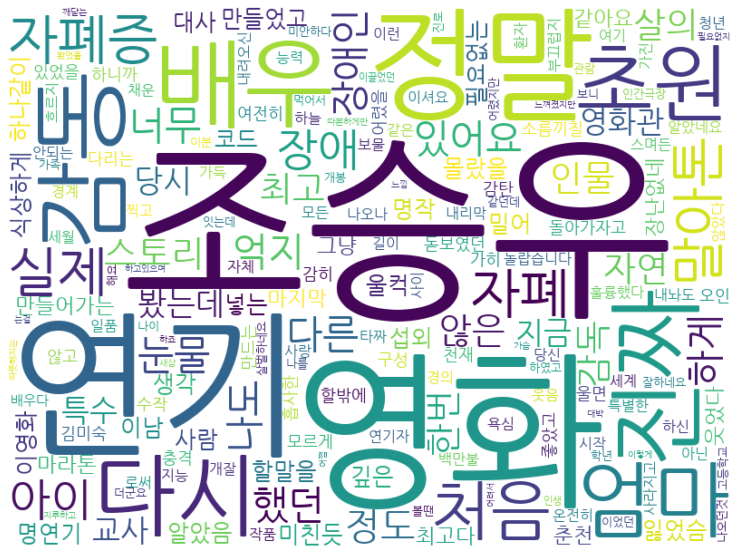

In [28]:
# 리스트를 문자열 형태로 변환 
words_for_cloud_string = " ".join(words_for_cloud) 

# 워드클라우드 환경 설정합니다. (폰트, 그림 크기, 배경색)
wc = WordCloud(font_path=path, width=800, height=600, background_color = "white")
wordcloud = wc.generate(words_for_cloud_string)
fig = plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear') # bilinear:부드럽게, none:이미지를 있는 그대로 보여주기
plt.axis("off")
plt.show()

## 4 토픽 모델링 (topic modeling)

- 문서의 집합에서 토픽을 찾아내는 프로세스로 검색 엔진, 고객 민원 시스템 등과 같이 문서의 주제를 알아내는 일이 중요한 곳에서 사용됨
- 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)은 토픽 모델링의 대표적인 알고리즘임 
- LDA는 문서들은 토픽들의 혼합으로 구성되어져 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정함. 데이터가 주어지면 LDA는 문서가 생성되던 과정을 역추적함

#### scikit-learn 패키지 이용

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000) # 상위 1,000개의 단어를 보존 

# tokenizer: 한글형태소 분석기를 사용하기 위해서는 별도의 함수를 만들어 지정해 주어야 함
# -- 예제 코드
#okt = Okt()
#def tw_tokenizer(text):
#    tokens_ko = okt.morphs(text)
#    return tokens_ko

#vectorizer = TfidfVectorizer(tokenizer = tw_tokenizer, ngram_range=(1,2), min_df =3, max_df = 0.9)


X = vectorizer.fit_transform(result['review'])
X.shape # TF-IDF 행렬의 크기 확인

(30, 251)

In [30]:
from sklearn.decomposition import LatentDirichletAllocation

# 5개 토픽 추출
lda_model=LatentDirichletAllocation(n_components=5,learning_method='online',random_state=0, max_iter=1)
lda_top=lda_model.fit_transform(X)

print(lda_model.components_)  #토픽별 단어의 비중 
print(lda_model.components_.shape) 

[[1.04570844 0.88095654 1.0551753  ... 0.91657126 0.89419563 0.81639854]
 [0.7574668  0.92125003 0.83871081 ... 0.88696438 0.7379602  1.08620625]
 [0.78043435 0.72916831 0.73501689 ... 0.94461048 0.87650501 0.85662494]
 [0.85894585 0.7992838  0.78302036 ... 0.95888337 0.94101418 0.88104443]
 [0.85169682 1.05533038 0.80150856 ... 0.70692735 0.96801896 0.86306427]]
(5, 251)


In [31]:
terms = vectorizer.get_feature_names() # 단어 집합

def get_topics(components, feature_names, n=10):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n -1:-1]])
         
get_topics(lda_model.components_,terms)

Topic 1: [('필요없는', 1.06), ('26살의', 1.06), ('이런', 1.05), ('가진', 1.05), ('알게', 1.05), ('1년', 1.05), ('수작', 1.04), ('울컥했던', 1.03), ('욕심과', 1.02), ('배우', 1.02)]
Topic 2: [('엄마를', 1.09), ('그냥', 1.09), ('흡사한', 1.09), ('진로로', 1.08), ('울컥했던', 1.07), ('가슴', 1.06), ('개잘함', 1.06), ('조승우의', 1.05), ('초원이', 1.03), ('조승우', 1.02)]
Topic 3: [('영화', 1.13), ('울면서', 1.13), ('조승우연기잘함', 1.12), ('최고의', 1.08), ('알게', 1.06), ('감동', 1.05), ('어렸을때', 1.05), ('경의를', 1.03), ('지금에서야', 1.02), ('진짜', 1.01)]
Topic 4: [('밀어넣는', 1.14), ('조승우는', 1.14), ('연기정말잘하네요', 1.13), ('나이먹어서', 1.12), ('가슴', 1.1), ('최고의', 1.07), ('감독', 1.06), ('조승우씨', 1.05), ('할밖에', 1.04), ('한번', 1.04)]
Topic 5: [('우리가', 1.17), ('조승우', 1.11), ('살벌하네요', 1.09), ('있어요', 1.09), ('대박연기', 1.08), ('진짜', 1.08), ('이영화는', 1.08), ('장애인에', 1.07), ('웃을때', 1.06), ('20세', 1.06)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Gensim 패키지 이용
- 토픽 모델링과 자연어 처리를 위한 오픈 소스 라이브러리 
- 단어의 문맥적 의미, 유사도를 반영한 벡터를 생성하기 때문에 성능이 좋음
- https://radimrehurek.com/gensim/models/word2vec.html

In [32]:
# 텍스트 분석을 위한 다양한 기능을 제공하는 gensim 패키지 이용
!pip install -U gensim

#!pip install gensim
#!pip install --upgrade pandas==1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import gensim
from gensim import corpora

In [34]:
topic = 3      # 추출할 토픽의 개수
keyword = 10   # 각 토픽에 포함할 키워드(단어) 개수

# LDA 토픽모델링 수행
dictionary = corpora.Dictionary(list(result['tokens']))    
corpus = [dictionary.doc2bow(text) for text in list(result['tokens'])]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=10)

topic_list = []  # 추출된 토픽과 토픽에 포함된 키워드 저장
for num in range(topic):
    topic_list.append(ldamodel.show_topic(num, keyword))

In [35]:
# 추출된 토픽과 키워드 출력
for index in range(len(topic_list)):
    print("# 주제", index + 1)
    for topic in topic_list[index]:
        print("\t", topic[0].split("/")[0])

# 주제 1
	 조승우
	 영화
	 연기
	 진짜
	 말아톤
	 배우
	 살의
	 스토리
	 한번
	 영화관
# 주제 2
	 조승우
	 연기
	 다시
	 실제
	 하게
	 영화
	 장애인
	 정말
	 처음
	 자폐
# 주제 3
	 정말
	 엄마
	 영화
	 연기
	 초원
	 말
	 감동
	 다른
	 봤는데
	 다시


In [36]:
# LDA토픽모델링 결과를 시각화하는 pyLDAvis 패키지 설치
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import pyLDAvis.gensim_models

# LDA 토픽 모델링 시각화
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

# 그래프의 분포를 확인하며 토픽의 개수 조정
# Intertopic Distance Map의 각 주제가 겹치지 않고 잘 구분되면 적절한 토픽개수라고 볼 수 있음

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [38]:
## 최적의 토픽수 구하기 (perlexity 값이 작을수록, coherence 값은 클수록 좋음)
from gensim.models import LdaModel
from gensim.models import CoherenceModel

num_topics: 1, perplexity: -5.398, coherence: -13.700
num_topics: 2, perplexity: -5.712, coherence: -14.294
num_topics: 3, perplexity: -5.888, coherence: -15.537
num_topics: 4, perplexity: -5.793, coherence: -12.867
num_topics: 5, perplexity: -5.990, coherence: -11.516
num_topics: 6, perplexity: -5.940, coherence: -10.593
num_topics: 7, perplexity: -5.877, coherence: -9.656
num_topics: 8, perplexity: -5.890, coherence: -8.402
num_topics: 9, perplexity: -6.109, coherence: -9.657
num_topics: 10, perplexity: -6.049, coherence: -11.768
num_topics: 11, perplexity: -6.099, coherence: -12.528
num_topics: 12, perplexity: -6.122, coherence: -12.733
num_topics: 13, perplexity: -6.055, coherence: -11.840
num_topics: 14, perplexity: -6.229, coherence: -12.618
num_topics: 15, perplexity: -6.227, coherence: -10.862
num_topics: 16, perplexity: -6.332, coherence: -13.298
num_topics: 17, perplexity: -6.404, coherence: -12.834
num_topics: 18, perplexity: -6.384, coherence: -14.299
num_topics: 19, perple

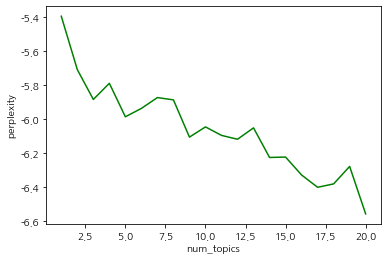

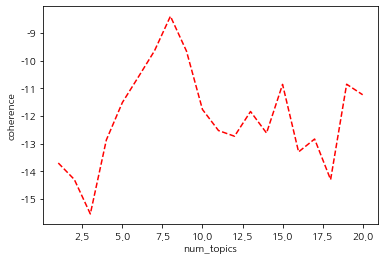

In [39]:
def show_per_coh(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 
    
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_per_coh(corpus, dictionary, start=1, end=20)